#### The code below is an implementation of temporal context model of memory retrieval:
Completing the code:

In [1]:
#Importing the required libraries
import numpy as np
from numpy import random
from scipy.linalg import norm
from drawFromADist import drawFromADist
import matplotlib.pyplot as plt

In [2]:
def find(a) :
    '''This function is written to convert the matlab code into python'''
    return np.array([i for i,val in enumerate(a) if val > 0])

In [3]:
#the temporal context model assumes that the past becomes increasingly
#dissimilar to the future, so that memories become harder to retrieve the
#farther away in the past they are

N_WORLD_FEATURES = 5
N_ITEMS = 10
ENCODING_TIME = 500
TEST_TIME = 20

#we are going to model the world as a set of N continuous-valued features.
#we will model observations of states of the world as samples from N
#Gaussians with time-varying means and fixed variance. For simplicity,
#assume that agents change nothing in the world.

#first fix the presentation schedule; I'm assuming its random

schedule = np.sort(np.random.randint(1, ENCODING_TIME+1, size=N_ITEMS))
schedule_load = ENCODING_TIME/np.median(np.diff(schedule,1))                
encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))

world_m = random.randint(1,10, size=(N_WORLD_FEATURES))       #Generating the world randomly       
world_var = 1
delta = 0.05                       #Delta specifies how-much the present world changes 
beta_param = 0.98                #what does this parameter affect?(Explained Below)
m = 0  #Changed from zero to one as code is in python

#simulating encoding

for time in range(1,ENCODING_TIME+1) :
    world_m = beta_param*world_m + delta
    world = random.normal(world_m, world_var)
    #any item I want to encode in memory, I encode in association with the
    #state of the world at that time.
    if m < N_ITEMS :
        if(time==schedule[m]):
            encoding[m,0:5] =  world
            encoding[m,5]=m             #encoding world_context and item
            m =  m + 1      
            
out=np.zeros(TEST_TIME)
while(time<ENCODING_TIME+TEST_TIME):
    #the state of the world is the retrieval cue
    world_m = beta_param*world_m + delta
    world = random.normal(world_m, world_var)
    soa=np.zeros(N_ITEMS)
    for m in range(N_ITEMS):
        t=world
        t=np.append(t,m)
        #print(t)
        soa[m]=np.dot(encoding[m],t.T)  #finding association strengths
        #print(soa)
    soa=soa/norm(soa)             #normalize
    out[time-ENCODING_TIME] = find(drawFromADist(soa))    #success is number of unique retrievals
    time = time + 1

In [4]:
#humans can retrieve about 7 items effectively from memory. get this model
#to behave like humans
success=len(np.unique(out))
print("Number of unique retrievals = {0}".format(success))

Number of unique retrievals = 9


#### Tuning the parameters to make the model behave like humans :
- *Finding the affect of beta_parameter :* <br>
In order to find the optimal value of beta_parameter, I have used the code above in a function :<br>
The average over 50 iteration is taken for each value of beta parameter.

In [5]:
def temporary_context_model(schedule,beta_param) :
    N_WORLD_FEATURES = 5
    N_ITEMS = 10
    ENCODING_TIME = 500
    TEST_TIME = 20
    
    
    #schedule = np.sort(np.random.randint(1, ENCODING_TIME+1, size=N_ITEMS))
    schedule_load = ENCODING_TIME/np.median(np.diff(schedule,1))                
    encoding = np.zeros((N_ITEMS,N_WORLD_FEATURES+1))
    
    world_m = random.randint(1,10, size=(N_WORLD_FEATURES))       #Generating the world randomly       
    world_var = 1
    delta = 0.05                       #what does this parameter affect?
    #beta_param = 0.001                #what does this parameter affect?
    m = 0 
    
    
    #simulating encoding

    for time in range(1,ENCODING_TIME+1) :
        world_m = beta_param*world_m + delta
        world = random.normal(world_m, world_var)
        #any item I want to encode in memory, I encode in association with the
        #state of the world at that time.
        if m < N_ITEMS :
            if(time==schedule[m]):
                encoding[m,0:5] =  world
                encoding[m,5]=m             #encoding world_context and item
                m =  m + 1      
                
    out=np.zeros(TEST_TIME)
    while(time<ENCODING_TIME+TEST_TIME):
        #the state of the world is the retrieval cue
        world_m = beta_param*world_m + delta
        world = random.normal(world_m, world_var)
        soa=np.zeros(N_ITEMS)
        for m in range(N_ITEMS):
            t=world
            t=np.append(t,m)
            soa[m]=np.dot(encoding[m],t.T)
            #print(soa)
        soa=soa/norm(soa)
        out[time-ENCODING_TIME] = find(drawFromADist(soa))
        time = time + 1
        
    return len(np.unique(out))  

In [6]:
schedule = np.sort(np.random.randint(1, ENCODING_TIME+1, size=N_ITEMS)) #Random schedule
out = []
betas=[0.0001,0.0009,0.01,0.09,0.1,0.9,0.99]
for beta in betas :
    avg=[]
    for i in range(50):
        avg.append(temporary_context_model(schedule,beta))
    out.append(np.mean(avg))

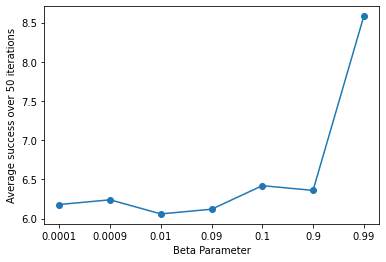

In [7]:
values = range(len(betas))
plt.plot(values,out,marker="o")
plt.xlabel("Beta Parameter")
plt.ylabel("Average success over 50 iterations")
plt.xticks(values,betas)
plt.show()

With the help of beta parameter,a linear context drift is applied to the model. It makes contexts at closer times more similar than contexts at farther times from the probe point.


An optimal value of beta_parameter lies somewhere between 0.9 and 1.

#### Finding the mean over multiple trials(50) with the optimal beta_parameter :

In [8]:
schedule = np.sort(np.random.randint(1, ENCODING_TIME+1, size=N_ITEMS)) #Random schedule
out = []
for i in range(50):
        out.append(temporary_context_model(schedule,beta_param=0.95))

In [9]:
print('Mean Successful retrivals over multiple trials:'+ str(np.mean(out)))

Mean Successful retrivals over multiple trials:7.4
